In [ ]:
import kagglehub
vzrenggamani_hanacaraka_path = kagglehub.dataset_download('vzrenggamani/hanacaraka')

print('Data source import complete.')


Data source import complete.


In [ ]:
!pip install jcopdl

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.7 MB/s eta 0:00:00
  Created wheel for jcopdl: filename=jcopdl-2.3.3-py2.py3-none-any.whl size=38153 sha256=d4e7b070c4dd271ac7f23be72118e00da3b75bc546c418cfa2dcaa4a00210fd9
  Store

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models import mobilenet_v2
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid

from tqdm.auto import tqdm
from jcopdl.callback import Callback

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from PIL import Image
import os

import pandas as pd
import numpy as np
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# **Data Preparation**

In [ ]:
PATH = vzrenggamani_hanacaraka_path + '/'
images, labels = [], []
for dirname, _, filenames in os.walk(PATH):
  for filename in filenames:
    images.append(os.path.join(dirname, filename).split('/')[-1]) # /folder/blabla/xxx.jpg
    labels.append(os.path.join(dirname, filename).split('/')[-2])

In [ ]:
label2cat = np.unique(labels)
label2cat

array(['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'hanacaraka', 'ja', 'ka',
       'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha',
       'wa', 'ya'], dtype='<U10')

In [ ]:
label2cat = np.delete(label2cat, np.where(label2cat == 'hanacaraka'))
images = np.delete(images, [0, 1, 2])
labels = np.delete(labels, [0, 1, 2])
label2cat

array(['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na',
       'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya'],
      dtype='<U10')

In [ ]:
ints = np.arange(0, len(label2cat))
dicts = dict(zip(label2cat, ints))
dicts

{np.str_('ba'): np.int64(0),
 np.str_('ca'): np.int64(1),
 np.str_('da'): np.int64(2),
 np.str_('dha'): np.int64(3),
 np.str_('ga'): np.int64(4),
 np.str_('ha'): np.int64(5),
 np.str_('ja'): np.int64(6),
 np.str_('ka'): np.int64(7),
 np.str_('la'): np.int64(8),
 np.str_('ma'): np.int64(9),
 np.str_('na'): np.int64(10),
 np.str_('nga'): np.int64(11),
 np.str_('nya'): np.int64(12),
 np.str_('pa'): np.int64(13),
 np.str_('ra'): np.int64(14),
 np.str_('sa'): np.int64(15),
 np.str_('ta'): np.int64(16),
 np.str_('tha'): np.int64(17),
 np.str_('wa'): np.int64(18),
 np.str_('ya'): np.int64(19)}

In [ ]:
datas = pd.DataFrame({'image_id':images, 'label':labels})
datas.head(), datas.shape
datas['label'].unique()

array(['na', 'wa', 'ra', 'ta', 'da', 'dha', 'ja', 'ya', 'ba', 'nya', 'ma',
       'tha', 'pa', 'ca', 'ga', 'nga', 'ka', 'la', 'ha', 'sa'],
      dtype=object)

In [ ]:
index = []
for i in range(len(datas)):
    try:
        Image.open(PATH + str(datas['label'].values[i]) + '/' + str(datas['image_id'].values[i]))

    except PIL.UnidentifiedImageError:
        index.append(i)

    except FileNotFoundError:
        index.append(i)

datas = datas.drop(index)
datas.head(), datas.shape

(                           image_id label
 0  4694059263615324057_base64_8.png    na
 1  4693979959028129056_base64_8.png    na
 2  4695702215132456743_base64_8.png    na
 3  4695817057422420412_base64_8.png    na
 4  4695952290615665559_base64_8.png    na,
 (1563, 2))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    datas['image_id'].values, datas['label'].values,
    test_size=0.3, stratify=datas['label'].values,
    random_state=24)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,
    test_size=0.5, stratify=y_val,
    random_state=24)


len(X_train), len(X_val), len(X_test)

(1094, 234, 235)

# **Dataset & Dataloader**

In [ ]:
class customDataset(Dataset):
    def __init__(self, x, y, path, maps_label=dicts, transform=None):
        self.X = x
        self.y = y
        self.path = path
        self.dicts = maps_label
        self.transform = transform

    def __getitem__(self, idx):
        img = Image.open(self.path + str(self.y[idx]) + '/' + str(self.X[idx])).convert('RGB')
        label = self.y[idx]
        label = self.label_2_ints(label)

        if self.transform is not None:
            img = self.transform(img)

        return img, label

    def label_2_ints(self, x):
        label_id = None
        for key, values in self.dicts.items():
            if x == key:
                label_id = values
        return label_id

    def __len__(self):
        return len(self.X)

In [ ]:
crop_size = 224
bs = 64
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(crop_size, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

val_transform = transforms.Compose([
    transforms.Resize(230),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
train_set = customDataset(X_train, y_train, PATH, transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=2)

val_set = customDataset(X_val, y_val, PATH, transform=val_transform)
valloader = DataLoader(val_set, batch_size=bs, shuffle=True)

test_set = customDataset(X_test, y_test, PATH, transform=val_transform)
testloader = DataLoader(test_set, shuffle=True)

In [ ]:
feature, target = next(iter(trainloader))
feature.shape, len(trainloader)

(torch.Size([64, 3, 224, 224]), 18)

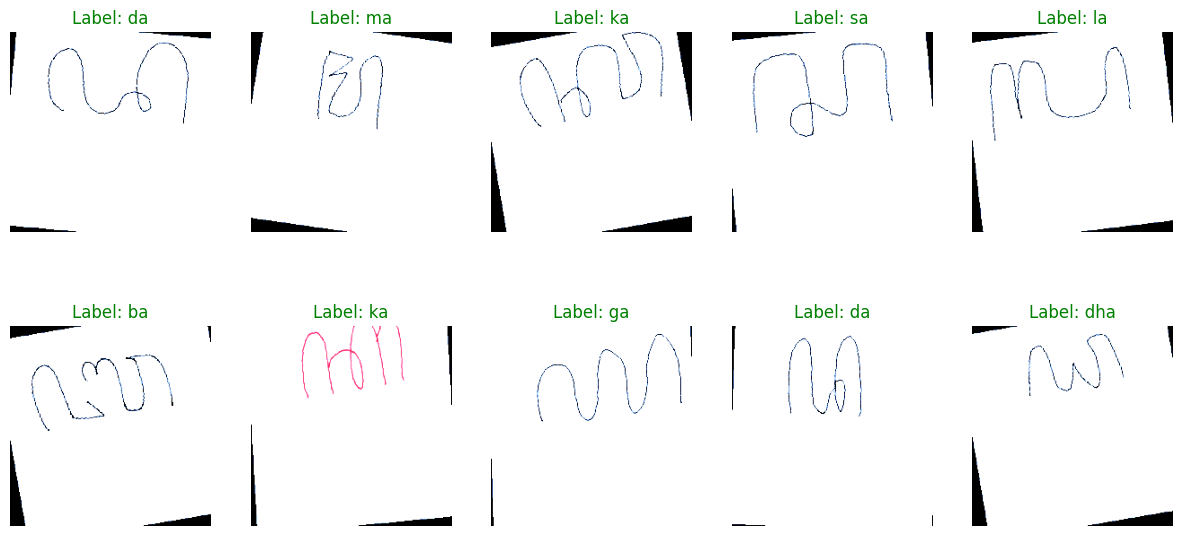

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(15, 7))
for img, label, ax in zip(feature, target, axes.flatten()):
  ax.imshow(img.permute(1,2,0).cpu())
  font = {"color":'g'}
  label = label2cat[label.item()]
  ax.set_title(f"Label: {label}", fontdict=font);
  ax.axis("off");

# **Architecture & Config**

In [ ]:
class CustomMobileNetv2(nn.Module):
  def __init__(self, output_size):
    super().__init__()
    self.mnet = mobilenet_v2(pretrained=True)
    self.freeze()

    self.mnet.classifier = nn.Sequential(
        nn.Linear(1280, 256),
        nn.ReLU(),
        nn.Linear(256, output_size),
        nn.LogSoftmax(1)
    )

  def forward(self, x):
    return self.mnet(x)

  def freeze(self):
    for param in self.mnet.parameters():
      param.requires_grad = False

  def unfreeze(self):
    for param in self.mnet.parameters():
      param.requires_grad = True

In [ ]:
# config = set_config({
#     'batch_size': bs,
#     'crop_size': crop_size,
#     'output_size': len(label2cat)
# })

from types import SimpleNamespace

config = SimpleNamespace(
    batch_size=bs,
    crop_size=crop_size,
    output_size=len(label2cat)  # atau len(label2cat) kalau sudah punya
)

# **Adaptation**

In [ ]:
from jcopdl.callback import Callback
import types

class SafeCallback(Callback):
    def _check_value(self, model, config, max_epoch):
        # Lewati pengecekan model.__module__ == "__main__"
        self.model = model
        self.config = config
        self.max_epoch = max_epoch

    def __init__(self, model, config, outdir="model", early_stop_patience=3):
        self.model = model
        self.config = config
        self.outdir = outdir
        self.early_stop_patience = early_stop_patience  # ← ini yang penting
        self.cost = {"train": [], "val": []}
        self.score = {"train": [], "val": []}
        self.best_score = -float("inf")
        self.counter = 0

    def log(self, train_result, val_result):
        train_cost, train_score = train_result
        val_cost, val_score = val_result

        self.cost["train"].append(train_cost)
        self.cost["val"].append(val_cost)
        self.score["train"].append(train_score)
        self.score["val"].append(val_score)

    def save_checkpoint(self):
        # Simpan model hanya jika skornya membaik
        current_score = self.score["val"][-1]
        if current_score > self.best_score:
            self.best_score = current_score
            torch.save(self.model.state_dict(), f"{self.outdir}/best_model.pt")
            print("📌 Checkpoint disimpan (val_score meningkat)")
            self.counter = 0
        else:
            self.counter += 1

    def early_stopping(self, model, monitor="val", patience=None):
        patience = patience or self.early_stop_patience
        if self.counter >= patience:
            print("⛔️ Early stopping triggered")
            return True
        return False

    def plot_cost(self):
        # Opsional: matplotlib untuk visualisasi
        pass

    def plot_score(self):
        pass

    def cost_runtime_plotting(self):
        pass

    def score_runtime_plotting(self):
        pass

    def reset_early_stop(self):
      self.best_score = -float("inf")
      self.counter = 0

model = CustomMobileNetv2(config.output_size).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
# callback = Callback(model, config, early_stop_patience=2, outdir='model')
callback = SafeCallback(model, config, early_stop_patience=2, outdir='model')

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 59.2MB/s]


In [ ]:
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
  if mode == 'train':
    model.train()
  elif mode == 'val':
    model.eval()

  cost = correct = 0
  for feature, target in dataloader:
    feature, target = feature.to(device), target.to(device)
    output = model(feature)
    loss = criterion(output, target)

    if mode == 'train':
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    cost += loss.item() * feature.shape[0]
    correct += (output.argmax(1) == target).sum().item()
  cost = cost/len(dataset)
  acc = correct/len(dataset)
  return cost, acc

In [ ]:
import os
os.makedirs("model", exist_ok=True)

while True:
  train_cost, train_score = loop_fn('train', train_set, trainloader, model, criterion, optimizer, device)
  with torch.no_grad():
    test_cost, test_score = loop_fn('val', val_set, valloader, model, criterion, optimizer, device)

  # Logging
  # callback.log(train_cost, test_cost, train_score, test_score)
  callback.log((train_cost, train_score), (test_cost, test_score))

  # Checkpoint
  callback.save_checkpoint()

  # Runtime Plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  # Early Stopping
  if callback.early_stopping(model, monitor='test_score'):
    callback.plot_cost()
    callback.plot_score()
    break

📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
⛔️ Early stopping triggered


# **Fine-Tuning**

In [ ]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

callback.reset_early_stop()
callback.early_stop_patience = 6

In [ ]:
while True:
  train_cost, train_score = loop_fn('train', train_set, trainloader, model, criterion, optimizer, device)
  with torch.no_grad():
    test_cost, test_score = loop_fn('val', val_set, valloader, model, criterion, optimizer, device)

  # Logging
  callback.log((train_cost, train_score), (test_cost, test_score))

  # Checkpoint
  callback.save_checkpoint()

  # Runtime Plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  # Early Stopping
  if callback.early_stopping(model, monitor='test_score'):
    callback.plot_cost()
    callback.plot_score()
    break

📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
📌 Checkpoint disimpan (val_score meningkat)
⛔️ Early stopping triggered


# **Predict**

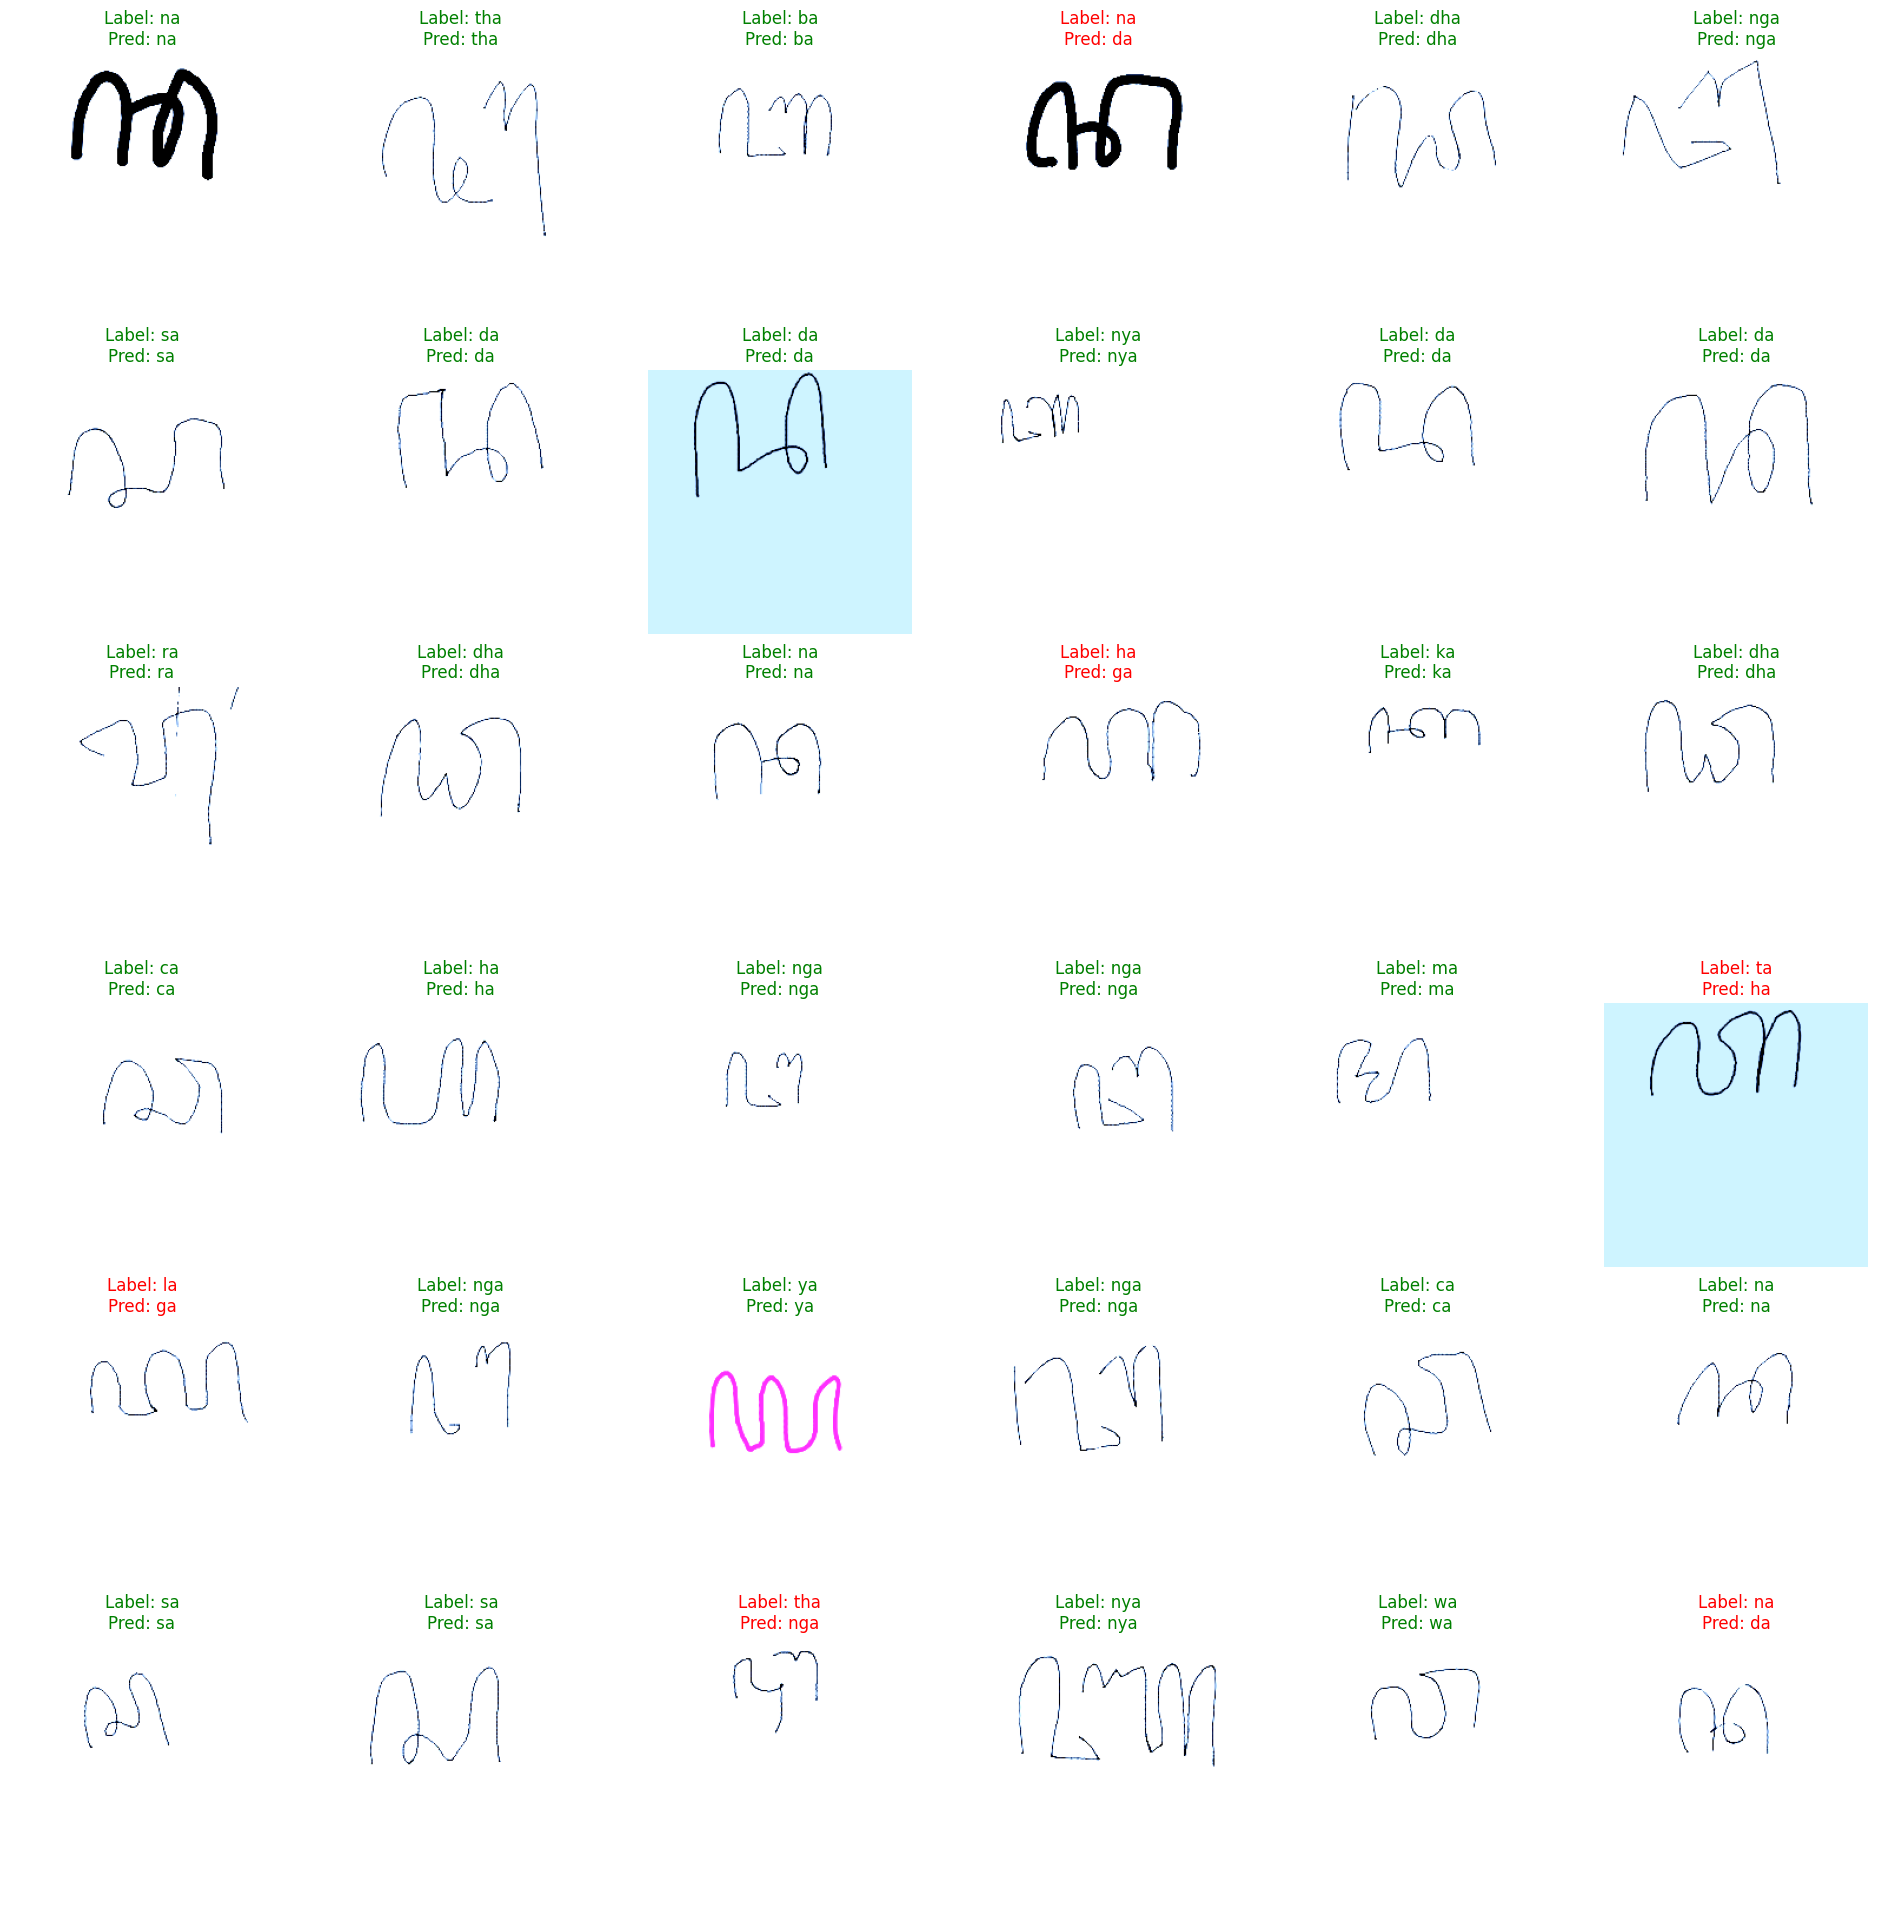

In [ ]:
for feature, target in valloader:
  feature, target = feature.to(device), target.to(device)
  with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)

fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
  ax.imshow(img.permute(1,2,0).cpu())
  font = {"color":'r'} if label != pred else {"color": 'g'}
  label, pred = label2cat[label.item()], label2cat[pred.item()]
  ax.set_title(f"Label: {label}\nPred: {pred}", fontdict=font);
  ax.axis("off");

# **Test Score**

In [ ]:
accuracy = []
for feature, target in testloader:
  feature, target = feature.to(device), target.to(device)
  with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
    if(target == preds):
      acc = 1
    else: acc = 0
    accuracy.append(acc)
accuracy = np.array(accuracy)
accuracy.mean()

np.float64(0.9063829787234042)

Saving 4696321589203850469_base64_25.png to 4696321589203850469_base64_25.png


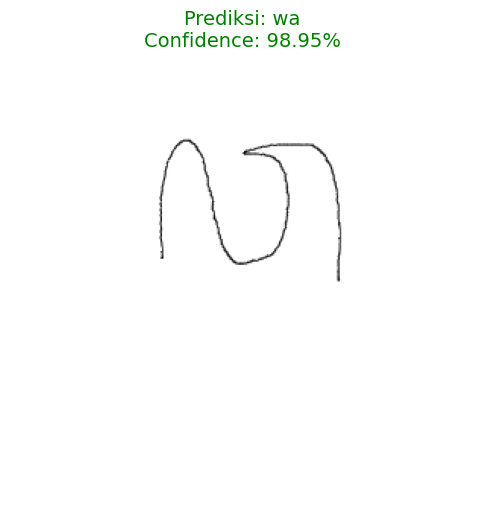

In [ ]:
from google.colab import files
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch

# Upload 1 gambar
uploaded = files.upload()

# Transformasi (harus sama seperti saat training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # sesuaikan jika kamu pakai crop_size lain
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Pastikan model di eval mode
model.eval()

# Loop untuk setiap file yg diupload
for fname in uploaded.keys():
    # Buka gambar dan transformasi
    img = Image.open(fname).convert('RGB')
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        pred = output.argmax(1).item()
        prob = torch.softmax(output, dim=1)[0][pred].item()
        pred_label = label2cat[pred]

    # Visualisasi mirip batch style
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Prediksi: {pred_label}\nConfidence: {prob:.2%}", fontsize=14, color='green')
    plt.show()
